In [ ]:
## mount drive to work with data and colab notebook ib our drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## making our drive our working current directory
import os
%cd /content/gdrive/My\ Drive/
print(os.listdir("../My Drive"))

/content/gdrive/My Drive
['Getting started.pdf', 'dashcam_boston.mp4', 'Colab Notebooks', 'logs', '82373_191501_bundle_archive.zip', 'AI Based Project ideas.gdoc', '06-Deep-Learning-Computer-Vision', 'road_trip.mp4', 'AVNET-ai-at-the-edge-whitepaper.pdf', '786787_1351797_bundle_archive.zip', 'history_before.png', 'model_before_accuracy.png', 'model_before_loss.png', 'Emailing 5_6291823636315636034.pdf', 'emotion detection', 'transfer_learning_project', 'traffic_sign_classification', 'model.h5', 'plot.png']


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Input
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.utils import np_utils
from tensorflow.python.saved_model import builder as saved_model_builder
from tensorflow.python.saved_model import utils
from tensorflow.python.saved_model import tag_constants, signature_constants
from tensorflow.python.saved_model.signature_def_utils_impl import build_signature_def, predict_signature_def
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint


In [ ]:
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2

In [ ]:
train_img_path ='/content/gdrive/My Drive/emotion detection/data/train'
val_img_path = '/content/gdrive/My Drive/emotion detection/data/test'

In [ ]:
height=48
width=48

## preprocessing step

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_img_path, # This is the source directory for training images
        target_size=(height, width),  # All images will be resized to 299 x 299
        batch_size=32,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 80 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        val_img_path,
        target_size=(height, width),
        batch_size= 32,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [ ]:
# create the base pre-trained model

height = 48
width = 48
model = vgg16 = VGG16(include_top=False, input_shape=(48, 48, 3), pooling='avg', weights='imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
for layer in model.layers:
         layer.trainable = True

In [ ]:
fit_epochs = 80

batch_size = 32

In [ ]:
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
class1=Dropout(0.5)(class1)
class1 = Dense(1024, activation='relu')(class1)
output = Dense(7, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

In [ ]:
num_train=28709
num_val=7178

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'sgd',metrics=['accuracy'])

In [ ]:

ckpt_callback = ModelCheckpoint(filepath='/content/gdrive/My Drive/emotion detection/models.h5', monitor='val_loss')

callback = [ckpt_callback]



Epoch 1/80
897/897 [==============================] - 7731s 9s/step - loss: 1.6433 - accuracy: 0.3428 - val_loss: 1.3526 - val_accuracy: 0.4812
Epoch 2/80
897/897 [==============================] - 81s 91ms/step - loss: 1.4268 - accuracy: 0.4481 - val_loss: 1.2820 - val_accuracy: 0.5116
Epoch 3/80
897/897 [==============================] - 79s 88ms/step - loss: 1.3300 - accuracy: 0.4907 - val_loss: 1.2273 - val_accuracy: 0.5290
Epoch 4/80
897/897 [==============================] - 77s 86ms/step - loss: 1.2663 - accuracy: 0.5166 - val_loss: 1.1832 - val_accuracy: 0.5456
Epoch 5/80
897/897 [==============================] - 77s 86ms/step - loss: 1.2217 - accuracy: 0.5357 - val_loss: 1.1265 - val_accuracy: 0.5718
Epoch 6/80
897/897 [==============================] - 77s 86ms/step - loss: 1.1871 - accuracy: 0.5538 - val_loss: 1.1014 - val_accuracy: 0.5774
Epoch 7/80
897/897 [==============================] - 77s 86ms/step - loss: 1.1521 - accuracy: 0.5669 - val_loss: 1.0925 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


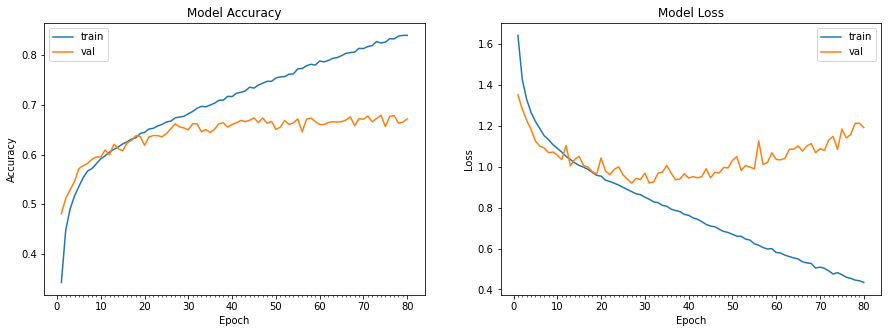

In [ ]:
model_info = model.fit(
            train_generator,
            steps_per_epoch=num_train // 32,
            epochs=fit_epochs,
            validation_data=validation_generator,
            validation_steps=num_val // 32,
            callbacks=callback)
plot_model_history(model_info)
model.save_weights('model.h5')

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.name

'functional_1'

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('/content/gdrive/My Drive/emotion detection/models.h5')

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      